<a href="https://colab.research.google.com/github/nourezzeddine1/VIP401/blob/main/Meansshiftimagesegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from matplotlib import pyplot as plt

Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python
matplotlib.pyplot is a collection of command style functions that make matplotlib work like MATLAB.
Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc.

In [ ]:
import cv2

OpenCV is a widely acclaimed open-source library that provides an extensive suite of computer vision and image processing functions.


In [ ]:

from sklearn.cluster import MeanShift, estimate_bandwidth

The sklearn library contains a lot of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction.
The sklearn.cluster module gathers popular unsupervised clustering algorithms.


*  cluster.mean_shift(X, *[, bandwidth, seeds, ...])

Perform mean shift clustering of data using a flat kernel.
*   cluster.estimate_bandwidth(X, *[, quantile, ...])

Estimate the bandwidth to use with the mean-shift algorithm.


In [ ]:
import numpy as np

NumPy can be used to perform a wide variety of mathematical operations on  arrays.

In [ ]:

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
image_path = '/content/drive/My Drive/gardenia.jpg'

In [ ]:
originImg = cv2.imread(image_path)

cv2.imread() method loads an image from the specified file.


---


Syntax: cv2.imread(filename, flag)


---


Return Value: The cv2.imread() function return a NumPy array if the image is loaded successfully.


In [ ]:
originImg = cv2.cvtColor(originImg, cv2.COLOR_BGR2RGB)

Syntax: cv2.cvtColor(src, code[, dst[, dstCn]])


---


Parameters:


---


src: It is the image whose color space is to be changed.


---


code: It is the color space conversion code.


---


dst: It is the output image of the same size and depth as src image. It is an optional parameter.


---


dstCn: It is the number of channels in the destination image. If the parameter is 0 then the number of the channels is derived automatically from src and code. It is an optional parameter.


---


 Return Value: It returns an image.

cv2.cvtColor() method is used to convert an image from one color space to another.

shape() in python determines the dimension of a given image and displays the height, width, and number of channels in the given image as the output on the screen.

(982, 980, 3)


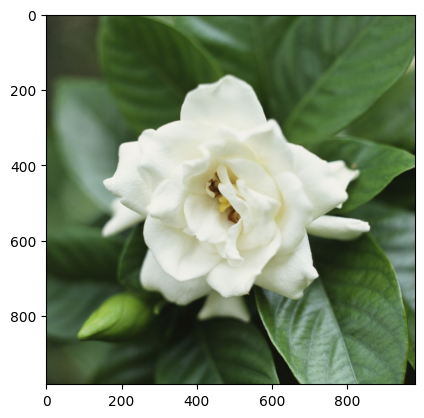

In [ ]:
# Shape of original image
originShape = originImg.shape
plt.imshow(originImg)
print(originShape)



In [ ]:
# Converting image into array of dimension [nb of pixels in originImage, 3]
flatImg=np.reshape(originImg, [-1, 3])
#same as originImg,reshape(-1, 3)
#This line is performing reshaping of the image array into a 2D array of pixels, where each pixel contains three color values representing the RGB (Red, Green, Blue) channels.

np.reshape(image, [-1, 3] ) coverts the image into an array of dimension [nb of pixels,3}

In [ ]:
# Estimate bandwidth for meanshift algorithm
bandwidth = estimate_bandwidth(flatImg, quantile=0.1, n_samples=100)



syntax: klearn.cluster.estimate_bandwidth(X, *, quantile=0.3, n_samples=None, random_state=0, n_jobs=None)

Parameters:

1) Xarray-like of shape (n_samples, n_features)



2) Input points( It's typically a 2D array where each row represents a data point and each column represents a feature)

3) quantilefloat, default=0.3(This parameter is used to determine the quantile range to consider for the KDE.
In this case, it's set to 0.1, meaning that only the lowest 10% of the pairwise distances between points are considered when estimating the bandwidth. This helps in making the bandwidth estimation robust to outliers.)

Should be between [0, 1] 0.5 means that the median of all pairwise distances is used.

4) n_samplesint, default=None (This parameter specifies the number of samples to use when computing the bandwidth. It determines the number of points from flatImg to consider when estimating the bandwidth.

In this case, it's set to 100, meaning that only 100 random samples from flatImg will be used to estimate the bandwidth. This can help speed up the estimation process for large datasets.)

The number of samples to use. If not given, all samples are used.

5) random_stateint, RandomState instance, default=None(random_state: This parameter is used to initialize the random number generator used for selecting random samples from the input data when n_samples is specified.
 By setting a value for random_state, you can ensure reproducibility of results. If you set random_state to a specific integer value (e.g., random_state=0), the random number generator will produce the same sequence of random numbers each time you run the function with the same input data.
This is useful for debugging and ensuring consistent results across different runs of your code.)

The generator used to randomly select the samples from input points for bandwidth estimation. Use an int to make the randomness deterministic. See Glossary.

6) n_jobsint, default=None

The number of parallel jobs to run for neighbors search. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors.
This parameter specifies the number of parallel jobs to run for computing the bandwidth. If set to None (which is the default), the computation will be performed sequentially using a single CPU core. If set to an integer value greater than 1, the computation will be parallelized across multiple CPU cores, potentially speeding up the process for large datasets. Setting n_jobs to -1 will use all available CPU cores.
However, keep in mind that parallelizing the computation may not always lead to significant speedup, especially for small to moderately sized datasets.

Returns:

1 ) bandwidthfloat

2) The bandwidth parameter.

3) The bandwidth is the distance/size scale of the kernel function, i.e. what the size of the “window” is across which you calculate the mean.

In [ ]:
ms = MeanShift(bandwidth = bandwidth, bin_seeding=True )

1) bandwidthfloat, default=None
Bandwidth used in the flat kernel.

If not given, the bandwidth is estimated using sklearn.cluster.estimate_bandwidth

2) seedsarray-like of shape (n_samples, n_features), default=None
Seeds used to initialize kernels. If not set, the seeds are calculated by clustering.get_bin_seeds with bandwidth as the grid size and default values for other parameters.

3) bin_seedingbool, default=False
it initializes cluster centers using a binning technique, which can significantly speed up the algorithm's convergence.
If set to False, cluster centers are randomly selected from the data points. Setting this parameter to True is usually recommended, especially for large datasets.

4) min_bin_freqint, default=1
To speed up the algorithm, accept only those bins with at least min_bin_freq points as seeds.(This parameter specifies the minimum number of data points that should fall within a bin for it to be considered as a candidate for a cluster center.
If the number of data points within a bin is less than min_bin_freq, that bin is not considered as a candidate cluster center.)

5) cluster_allbool, default=True
If true, then all points are clustered, even those orphans that are not within any kernel. Orphans are assigned to the nearest kernel. If false, then orphans are given cluster label -1.
You might set cluster_all to False if you are only interested in identifying the main clusters in your data and want to disregard outliers or noise points.
Conversely, you might set it to True if you want to ensure that every point is assigned to a cluster.

5) n_jobsint, default=None
The number of jobs to use for the computation. The following tasks benefit from the parallelization:
The default value for n_jobs is None, which means that the computation will be performed using a single core. Setting n_jobs to -1 will use all available CPU cores.
The search of nearest neighbors for bandwidth estimation and label assignments. See the details in the docstring of the NearestNeighbors class.

In [ ]:
# Performing meanshift on flatImg
ms.fit(flatImg)

MeanShift(bandwidth=23.58148930635091, bin_seeding=True)

ms.fit() performs the training process of the mean shift algorithm,
which involves iteratively shifting data points towards local modes until convergence and assigning cluster labels based on the converged positions. After fitting the model, you can access the cluster labels using ms.labels_
 (r,g,b) vectors corresponding to the different clusters after meanshift
labels=ms.labels_
the cluster labels represent which cluster each data point belongs to after the mean shift algorithm has converged.

In [ ]:
# Remaining colors after meanshift
cluster_centers = ms.cluster_centers_
print(cluster_centers)

[[ 53.32495644  75.46760294  37.939906  ]
 [ 77.29816055 108.91817312  63.94543417]
 [226.92319934 229.98961519 220.61718481]
 [135.79057651 160.8194586  141.69912787]
 [146.65484551 182.86025281  85.92345506]
 [136.85423729 110.80451977  52.90734463]
 [ 91.77571252  59.86988848  22.21437423]
 [112.50194049  81.12419146  34.28589909]]


ms.cluster_centers_  contains the centroids of the clusters identified by the algorithm.

In [ ]:
# Finding and diplaying the number of clusters
labels = ms.labels_
print(labels)
labels_unique = np.unique(labels)

[0 0 0 ... 0 0 0]


labels_ndarray of shape (n_samples,)
Labels of each point.

Labels_unique will contain an array of unique cluster labels found in labels. These labels can then be used for various purposes such as analysis, visualization, or further processing.
For example, you might use labels_unique to: count the number of clusters

In [ ]:
n_clusters_ = len(labels_unique)
print(labels_unique)
print("number of estimated clusters : %d" % n_clusters_)


[0 1 2 3 4 5 6 7]
number of estimated clusters : 8


In [ ]:
cluster_centers = np.uint8(cluster_centers)
print(cluster_centers)

[[ 53  75  37]
 [ 77 108  63]
 [226 229 220]
 [135 160 141]
 [146 182  85]
 [136 110  52]
 [ 91  59  22]
 [112  81  34]]


The np.int8 type is a signed 8-bit integer, ranging from -128 to 127. np.unit8 in Python is often preferred when negative values are not required, as it offers a wider range of positive values.

In [ ]:
segmented_data = cluster_centers[labels.flatten()] #no need for flatting
print(labels.flatten())
print(segmented_data)

[0 0 0 ... 0 0 0]
[[53 75 37]
 [53 75 37]
 [53 75 37]
 ...
 [53 75 37]
 [53 75 37]
 [53 75 37]]


cluster_centers[labels.flatten()]: This line is indexing the cluster_centers array using the flattened labels array. It means that for each data point, it retrieves the cluster center corresponding to its assigned label. This operation effectively assigns each data point to its corresponding cluster center.

flatten(): This is a method commonly used in array manipulation libraries like NumPy. When applied to a multi-dimensional array, it collapses the array into a one-dimensional array by concatenating all of its elements along rows.

In [ ]:
segmentedImg = segmented_data.reshape((originShape))

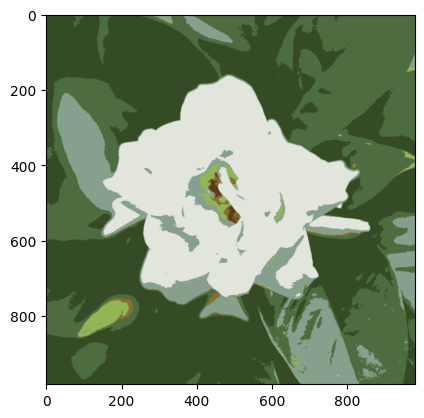

In [ ]:
plt.imshow(segmentedImg)